In [19]:
import pandas as pd
import matplotlib as mlt
import seaborn as sns

In [20]:
ecomdf = pd.read_csv("C:/Users/peekk/Downloads/ecom/data.csv", encoding="ISO-8859-1")

In [21]:
ecomdf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [22]:
ecomdf.shape

(541909, 8)

In [23]:
ecomdf.dtypes
ecomdf['InvoiceDate'] = pd.to_datetime(ecomdf['InvoiceDate'])

In [24]:
ecomdf.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [25]:
ecomdf.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Min quantitty and unitprice are sus 

In [26]:
ecomdf[ecomdf['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [34]:
ecomdf = ecomdf.query('UnitPrice > 0')
ecomdf.describe()

,Quantity,UnitPrice,CustomerID
count,539392.000000,539392.000000,539392.00000
mean,9.845904,4.673648,11529.47611
std,215.412652,94.614722,6748.77820
min,-80995.000000,0.001000,0.00000
25%,1.000000,1.250000,12380.00000
50%,3.000000,2.080000,14395.00000
75%,10.000000,4.130000,16265.00000
max,80995.000000,38970.000000,18287.00000


In [27]:
ecomdf['CustomerID'].isnull().sum()

135080

In [28]:
ecomdf[ecomdf.CustomerID.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [29]:
ecomdf = ecomdf.fillna({'CustomerID' : 0})
ecomdf[ecomdf.CustomerID == 0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,0.0,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,0.0,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,0.0,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,0.0,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,0.0,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,0.0,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,0.0,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,0.0,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,0.0,United Kingdom


In [30]:
ecomdf = ecomdf.astype({'CustomerID' : 'int'})
ecomdf.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object

Total transactions per Country

In [47]:
ecomdf.groupby('Country',as_index=False).agg({'CustomerID':'count'}).sort_values('CustomerID', ascending=False).head()

,Country,CustomerID
36,United Kingdom,492979
14,Germany,9493
13,France,8556
10,EIRE,8192
31,Spain,2532


Unique Customers per Country

In [46]:
ecomdf[ecomdf.CustomerID > 0].groupby('Country', as_index=False).agg({'CustomerID': pd.Series.nunique}).sort_values('CustomerID', ascending=False).head()

,Country,CustomerID
35,United Kingdom,3949
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25


In [48]:
UK_ecom = ecomdf.query('Country == "United Kingdom" & CustomerID > 0')
UK_ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [58]:
Transactions_data = UK_ecom.groupby('CustomerID', as_index=False) \
.agg({'InvoiceNo' : 'count'}) \
.rename(columns={'InvoiceNo': 'transactions'}) \
.sort_values('transactions', ascending=False)

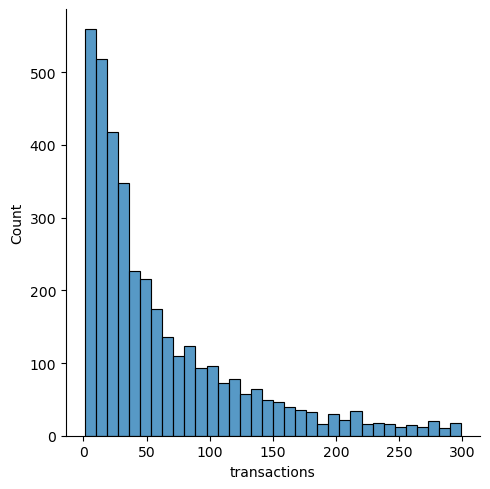

In [62]:
sns.displot(Transactions_data.query('transactions < 300').transactions, kde=False)

In [65]:
UK_ecom.to_csv('Clean_UK_data.csv', index=False)